# Exploratory Data Analysis for datasets
--- 

Aim 
* Understand structure of datasets, variables and where things are.

There are 11 files supplied in total, which are in the directory `./data/`.

Only the `.pkl` files have been downloaded, which are still approximately 1.7 GB in size. 

GitHub blocks pushes that are over 100 MB so they have not been committed.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
%config InlineBackend.figure_formats = ['svg']

In [2]:
files = []
for file in os.listdir('data/'):
    if file.endswith('.pkl'):
        files.append(file)

print(files, len(files))

['total_dataset.pkl', 'jpsi_mu_k_swap.pkl', 'psi2S.pkl', 'jpsi_mu_pi_swap.pkl', 'phimumu.pkl', 'pKmumu_piTop.pkl', 'signal.pkl', 'pKmumu_piTok_kTop.pkl', 'k_pi_swap.pkl', 'jpsi.pkl', 'acceptance_mc.pkl'] 11


The number of entries for each dataset varies. For one dataset, there are only 773 events. Will there be a problem with this when creating a ML algorithm?

In [3]:
summary = pd.DataFrame(columns=['filename', 'size'])
for file in files:
    df = pd.read_pickle('data/' + file)
    summary = summary.append({'filename': file, 'size':len(df)}, ignore_index=True)
summary

,filename,size
0,total_dataset.pkl,498245
1,jpsi_mu_k_swap.pkl,1986
2,psi2S.pkl,181076
3,jpsi_mu_pi_swap.pkl,773
4,phimumu.pkl,68318
5,pKmumu_piTop.pkl,1127
6,signal.pkl,255741
7,pKmumu_piTok_kTop.pkl,1447
8,k_pi_swap.pkl,133292
9,jpsi.pkl,786776


In [20]:
786776/ summary.iloc[1:10]['size'].sum()

0.5499868580727784

# Total Dataset
* The `total_dataset.pkl` is the LHCb data to analyse.


In [4]:
total = pd.read_pickle('data/total_dataset.pkl')
pd.set_option('max_columns', None)
total

,mu_plus_MC15TuneV1_ProbNNk,mu_plus_MC15TuneV1_ProbNNpi,mu_plus_MC15TuneV1_ProbNNmu,mu_plus_MC15TuneV1_ProbNNe,mu_plus_MC15TuneV1_ProbNNp,mu_plus_P,mu_plus_PT,mu_plus_ETA,mu_plus_PHI,mu_plus_PE,mu_plus_PX,mu_plus_PY,mu_plus_PZ,mu_plus_IPCHI2_OWNPV,mu_minus_MC15TuneV1_ProbNNk,mu_minus_MC15TuneV1_ProbNNpi,mu_minus_MC15TuneV1_ProbNNmu,mu_minus_MC15TuneV1_ProbNNe,mu_minus_MC15TuneV1_ProbNNp,mu_minus_P,mu_minus_PT,mu_minus_ETA,mu_minus_PHI,mu_minus_PE,mu_minus_PX,mu_minus_PY,mu_minus_PZ,mu_minus_IPCHI2_OWNPV,K_MC15TuneV1_ProbNNk,K_MC15TuneV1_ProbNNpi,K_MC15TuneV1_ProbNNmu,K_MC15TuneV1_ProbNNe,K_MC15TuneV1_ProbNNp,K_P,K_PT,K_ETA,K_PHI,K_PE,K_PX,K_PY,K_PZ,K_IPCHI2_OWNPV,Pi_MC15TuneV1_ProbNNk,Pi_MC15TuneV1_ProbNNpi,Pi_MC15TuneV1_ProbNNmu,Pi_MC15TuneV1_ProbNNe,Pi_MC15TuneV1_ProbNNp,Pi_P,Pi_PT,Pi_ETA,Pi_PHI,Pi_PE,Pi_PX,Pi_PY,Pi_PZ,Pi_IPCHI2_OWNPV,B0_MM,B0_ENDVERTEX_CHI2,B0_ENDVERTEX_NDOF,B0_FDCHI2_OWNPV,Kstar_MM,Kstar_ENDVERTEX_CHI2,Kstar_ENDVERTEX_NDOF,Kstar_FDCHI2_OWNPV,J_psi_MM,J_psi_ENDVERTEX_CHI2,J_psi_ENDVERTEX_NDOF,J_psi_FDCHI2_OWNPV,B0_IPCHI2_OWNPV,B0_DIRA_OWNPV,B0_OWNPV_X,B0_OWNPV_Y,B0_OWNPV_Z,B0_FD_OWNPV,B0_ID,q2,phi,costhetal,costhetak,polarity,year
0,0.000303,0.282979,0.966269,2.708744e-06,2.358479e-05,22529.217656,3371.873364,2.586844,-2.463601,22529.465415,-2626.130000,-2114.940000,22275.460000,70.701008,0.002457,0.092010,0.998433,4.034561e-07,4.906135e-04,81540.897697,9651.149975,2.823654,-2.694584,81540.966151,-8702.870000,-4171.900000,80967.730000,8.875478,0.069748,0.010268,-1000.000000,9.986840e-01,0.062544,7363.169875,332.027626,3.791666,0.401218,7379.701050,305.660000,129.670000,7355.680000,14.776949,0.016157,0.859210,-1000.0,1.652386e-07,0.010583,4228.375666,517.000531,2.790918,-2.524810,4230.678518,-421.740000,-299.040000,4196.650000,11.286473,5207.656947,19.883980,5,93.424302,1141.238000,1.404714,1,25.129624,1904.696000,1.119574,1,79.203282,3.159163,0.999968,0.8398,-0.2076,103.8536,2.377813,-511,3.627847,0.687398,-0.467658,0.992306,1,2016
1,0.020258,0.003956,0.998035,8.310519e-06,2.909099e-03,161024.220000,8534.230892,3.629914,-1.540762,161024.254665,256.282917,-8530.381936,160797.905240,14.296193,0.000362,0.060204,0.990564,1.333117e-06,1.854383e-05,14411.220000,1511.469380,2.945311,-2.311160,14411.607321,-1019.571040,-1115.802213,14331.738283,384.612312,0.998938,0.001425,-1000.000000,3.024387e-07,0.007307,37167.950000,3011.735455,3.204432,-1.823306,37171.228446,-752.436891,-2916.228588,37045.727915,49.893348,0.159368,0.701000,-1000.0,3.885431e-08,0.093486,4610.670000,544.932810,2.825103,-1.653290,4612.781990,-44.902299,-543.079691,4578.354080,38.273170,5301.665969,4.817663,5,595.683158,858.348769,0.688884,1,93.627591,3703.792558,0.226903,1,529.336399,0.894800,0.999998,0.7938,-0.1812,-32.1607,6.161559,-511,13.718153,1.989341,0.814684,0.110453,-1,2016
2,0.088214,0.007898,0.998085,1.014832e-05,3.530469e-03,109393.330000,5710.313234,3.645141,0.265732,109393.381025,5509.884739,1499.615748,109244.189645,2981.436866,0.094421,0.015697,0.995131,1.037932e-06,1.544617e-03,88415.880000,7368.072478,3.176302,0.216243,88415.943132,7196.474119,1580.902369,88108.338675,3269.153291,0.982696,0.127773,-1000.000000,7.269481e-07,0.004898,46366.910000,3312.751173,3.330676,-0.083727,46369.538060,3301.146292,-277.044201,46248.416434,1542.015832,0.000128,0.987065,-1000.0,1.053780e-04,0.000009,25805.840000,2136.945667,3.182652,-0.253811,25806.217428,2068.483472,-536.575165,25717.209050,5407.187831,5272.426522,3.634679,5,38894.639606,890.802323,0.008342,1,9410.613563,3093.250321,2.101162,1,21959.653044,2.782695,1.000000,0.8126,-0.1998,40.6020,47.151129,-511,9.567142,-1.738231,0.242143,-0.598537,1,2016
3,0.000404,0.016088,0.990623,3.606953e-06,1.098000e-05,13815.260342,1236.546436,3.104590,1.340393,13815.664371,282.390000,1203.870000,13759.810000,194.296469,0.002816,0.028667,0.999300,3.555200e-06,3.011680e-05,52285.455669,4366.470496,3.174162,-1.049955,52285.562426,2172.800000,-3787.480000,52102.810000,157.873671,0.002285,0.914874,0.008754,8

In [5]:
#pd.set_option('max_rows', None)
total.nunique()

mu_plus_MC15TuneV1_ProbNNk     475949
mu_plus_MC15TuneV1_ProbNNpi    475534
mu_plus_MC15TuneV1_ProbNNmu    294661
mu_plus_MC15TuneV1_ProbNNe     475718
mu_plus_MC15TuneV1_ProbNNp     476496
                                ...  
phi                            498240
costhetal                      498240
costhetak                      498240
polarity                            2
year                                1
Length: 81, dtype: int64

In [6]:
print(total.iloc[0])

mu_plus_MC15TuneV1_ProbNNk     0.000303
mu_plus_MC15TuneV1_ProbNNpi    0.282979
mu_plus_MC15TuneV1_ProbNNmu    0.966269
mu_plus_MC15TuneV1_ProbNNe     0.000003
mu_plus_MC15TuneV1_ProbNNp     0.000024
                                 ...   
phi                            0.687398
costhetal                     -0.467658
costhetak                      0.992306
polarity                              1
year                               2016
Name: 0, Length: 81, dtype: object


In [7]:
total.columns

Index(['mu_plus_MC15TuneV1_ProbNNk', 'mu_plus_MC15TuneV1_ProbNNpi',
       'mu_plus_MC15TuneV1_ProbNNmu', 'mu_plus_MC15TuneV1_ProbNNe',
       'mu_plus_MC15TuneV1_ProbNNp', 'mu_plus_P', 'mu_plus_PT', 'mu_plus_ETA',
       'mu_plus_PHI', 'mu_plus_PE', 'mu_plus_PX', 'mu_plus_PY', 'mu_plus_PZ',
       'mu_plus_IPCHI2_OWNPV', 'mu_minus_MC15TuneV1_ProbNNk',
       'mu_minus_MC15TuneV1_ProbNNpi', 'mu_minus_MC15TuneV1_ProbNNmu',
       'mu_minus_MC15TuneV1_ProbNNe', 'mu_minus_MC15TuneV1_ProbNNp',
       'mu_minus_P', 'mu_minus_PT', 'mu_minus_ETA', 'mu_minus_PHI',
       'mu_minus_PE', 'mu_minus_PX', 'mu_minus_PY', 'mu_minus_PZ',
       'mu_minus_IPCHI2_OWNPV', 'K_MC15TuneV1_ProbNNk',
       'K_MC15TuneV1_ProbNNpi', 'K_MC15TuneV1_ProbNNmu',
       'K_MC15TuneV1_ProbNNe', 'K_MC15TuneV1_ProbNNp', 'K_P', 'K_PT', 'K_ETA',
       'K_PHI', 'K_PE', 'K_PX', 'K_PY', 'K_PZ', 'K_IPCHI2_OWNPV',
       'Pi_MC15TuneV1_ProbNNk', 'Pi_MC15TuneV1_ProbNNpi',
       'Pi_MC15TuneV1_ProbNNmu', 'Pi_MC15TuneV1_ProbNN

# Standard Model Signal

* `sig.pkl` - The signal decay, simulated as per the Standard Model

In [8]:
sig = pd.read_pickle('data/signal.pkl')
sig

,mu_plus_MC15TuneV1_ProbNNk,mu_plus_MC15TuneV1_ProbNNpi,mu_plus_MC15TuneV1_ProbNNmu,mu_plus_MC15TuneV1_ProbNNe,mu_plus_MC15TuneV1_ProbNNp,mu_plus_P,mu_plus_PT,mu_plus_ETA,mu_plus_PHI,mu_plus_PE,mu_plus_PX,mu_plus_PY,mu_plus_PZ,mu_plus_IPCHI2_OWNPV,mu_minus_MC15TuneV1_ProbNNk,mu_minus_MC15TuneV1_ProbNNpi,mu_minus_MC15TuneV1_ProbNNmu,mu_minus_MC15TuneV1_ProbNNe,mu_minus_MC15TuneV1_ProbNNp,mu_minus_P,mu_minus_PT,mu_minus_ETA,mu_minus_PHI,mu_minus_PE,mu_minus_PX,mu_minus_PY,mu_minus_PZ,mu_minus_IPCHI2_OWNPV,K_MC15TuneV1_ProbNNk,K_MC15TuneV1_ProbNNpi,K_MC15TuneV1_ProbNNmu,K_MC15TuneV1_ProbNNe,K_MC15TuneV1_ProbNNp,K_P,K_PT,K_ETA,K_PHI,K_PE,K_PX,K_PY,K_PZ,K_IPCHI2_OWNPV,Pi_MC15TuneV1_ProbNNk,Pi_MC15TuneV1_ProbNNpi,Pi_MC15TuneV1_ProbNNmu,Pi_MC15TuneV1_ProbNNe,Pi_MC15TuneV1_ProbNNp,Pi_P,Pi_PT,Pi_ETA,Pi_PHI,Pi_PE,Pi_PX,Pi_PY,Pi_PZ,Pi_IPCHI2_OWNPV,B0_MM,B0_ENDVERTEX_CHI2,B0_ENDVERTEX_NDOF,B0_FDCHI2_OWNPV,Kstar_MM,Kstar_ENDVERTEX_CHI2,Kstar_ENDVERTEX_NDOF,Kstar_FDCHI2_OWNPV,J_psi_MM,J_psi_ENDVERTEX_CHI2,J_psi_ENDVERTEX_NDOF,J_psi_FDCHI2_OWNPV,q2,phi,costhetal,costhetak,B0_IPCHI2_OWNPV,B0_DIRA_OWNPV,B0_OWNPV_X,B0_OWNPV_Y,B0_OWNPV_Z,B0_FD_OWNPV,B0_ID,polarity,year
0,0.001626,0.368621,0.965144,2.496697e-06,6.789551e-05,28796.58,2531.302013,3.122733,-2.023842,28796.773836,-1107.965812,-2275.939726,28685.109897,5200.297017,0.003853,0.129218,0.993714,2.191040e-06,3.501567e-03,36820.21,1892.582858,3.660590,3.025223,36820.361597,-1879.782709,219.742665,36771.537833,3210.481325,0.952580,0.150182,-1000.0,1.172057e-06,0.265748,18897.33,542.935290,4.242727,-1.156751,18903.777350,218.431523,-497.057741,18889.528909,122.763954,0.000466,0.994559,-1000.0,2.061752e-03,0.000080,23073.62,862.307882,3.979631,-0.556162,23074.042120,732.347283,-455.238774,23057.501274,603.692520,5284.270324,6.390714,5,13571.160252,879.282240,1.930010,1,828.361100,2807.328516,0.526095,1,12427.533366,7.881143,1.795533,-0.077694,-0.885188,4.304049,0.999999,0.7708,-0.2054,40.5605,27.879712,511,1,2016
1,0.000075,0.008453,0.998412,5.320784e-06,1.026381e-06,24673.47,2274.749879,3.074874,-1.014814,24673.696228,1200.562971,-1932.132388,24568.386899,2674.051363,0.000106,0.038999,0.997084,4.350128e-06,3.458252e-06,28591.17,4474.787157,2.541605,-2.215601,28591.365229,-2689.537777,-3576.325859,28238.825788,1181.105151,0.994033,0.001715,-1000.0,3.064377e-07,0.349174,10465.38,1785.938424,2.453914,-1.894421,10477.017492,-567.938144,-1693.228372,10311.867071,486.837980,0.080632,0.899613,-1000.0,1.440089e-08,0.031932,2641.69,584.915261,2.188366,-2.507974,2645.374433,-471.377515,-346.307812,2576.121153,2085.204114,5298.855894,6.877693,5,9942.800523,925.766975,0.207682,1,3643.076035,4000.524319,3.247928,1,7484.268965,16.004902,1.677407,0.783783,-0.133953,1.159875,0.999999,0.7926,-0.1152,-1.7938,12.678658,-511,1,2016
2,0.000051,0.007129,0.998914,6.864172e-06,1.078601e-06,28464.70,3379.198551,2.820631,-2.119273,28464.896096,-1761.872664,-2883.537335,28263.406788,555.260890,0.000142,0.011256,0.994612,1.088820e-06,8.162336e-07,13748.96,3336.596706,2.094099,-1.891526,13749.365977,-1051.892693,-3166.449011,13337.954247,3402.503430,0.987394,0.088656,-1000.0,4.170585e-07,0.018577,41004.13,4596.040121,2.878469,-1.540241,41007.101751,140.410218,-4593.894836,40745.737105,438.598188,0.045356,0.707700,-1000.0,4.235347e-03,0.033577,2250.52,137.250817,3.489323,-0.939693,2254.843699,80.982924,-110.813143,2246.330894,64.881677,5267.743449,4.914970,5,10027.645173,1046.289247,0.437560,1,582.743279,2617.422809,0.000709,1,7729.029705,6.851072,-1.776031,-0.375908,0.741662,4.786264,0.999997,0.8396,-0.2445,53.8937,12.155244,511,1,2016
3,0.006548,0.088188,0.949859,7.272984e-06,5.321462e-03,11540.26,1048.238326,3.089809,-0.829094,11540.743674,708.131068,-772.886783,11492.553993,1108.518673,0.037230,0.078754,0.999341,4.784393e-06,3.200485e-04,89285.35,4997.859709,3.575191,-0.791353,89285.412517,3512.914633,-3555.001048,89145.359514,601.806342,0.992092,0.001614,-1000.0,3.813968e-04,0.632330,18255.57,868.226176,3.738354,-2.8

# Backgrounds simulation samples

* `jpsi.pkl` - <img src="https://latex.codecogs.com/gif.latex?B^{0}\rightarrow{}J/\psi{}K^{\ast{}0} " /> with <img src="https://latex.codecogs.com/gif.latex?J/\psi\rightarrow\mu\mu " />
* `psi2S.pkl` - <img src="https://latex.codecogs.com/gif.latex?B^{0}\rightarrow{}\psi{}(2S)K^{\ast{}0} " /> with <img src="https://latex.codecogs.com/gif.latex?\psi{}(2S)\rightarrow\mu\mu " />
* `jpsi_mu_k_swap.pkl` - <img src="https://latex.codecogs.com/gif.latex?B^{0}\rightarrow{}J/\psi{}K^{\ast{}0} " /> with the muon reconstructed as kaon and the kaon reconstructed as a muon
* `jpsi_mu_pi_swap.pkl` - <img src="https://latex.codecogs.com/gif.latex?B^{0}\rightarrow{}J/\psi{}K^{\ast{}0} " /> with the muon reconstructed as pion and the pion reconstructed as a muon
* `k_pi_swap.pkl` - signal decay but with the kaon reconstructed as a pion and the pion reconstructed as a kaon
* `phimumu.pkl` - <img src="https://latex.codecogs.com/gif.latex?B_{s}^{0}\rightarrow{}\phi\mu\mu " /> with <img src="https://latex.codecogs.com/gif.latex?\phi{}\rightarrow{}KK " /> and one of the kaons reconstructed as a pion
* `pKmumu_piTok_kTop.pkl` - <img src="https://latex.codecogs.com/gif.latex?\Lambda_{b}^{0}\rightarrow{}pK\mu\mu " /> with the proton reconstructed as a kaon and the kaon reconstructed as a pion
* `pKmumu_piTop.pkl`  - <img src="https://latex.codecogs.com/gif.latex?\Lambda_{b}^{0}\rightarrow{}pK\mu\mu " /> with the proton reconstructed as a pion

In [9]:
acc = pd.read_pickle('data/acceptance_mc.pkl')
cols = acc.columns
acc

,mu_plus_MC15TuneV1_ProbNNk,mu_plus_MC15TuneV1_ProbNNpi,mu_plus_MC15TuneV1_ProbNNmu,mu_plus_MC15TuneV1_ProbNNe,mu_plus_MC15TuneV1_ProbNNp,mu_plus_P,mu_plus_PT,mu_plus_ETA,mu_plus_PHI,mu_plus_PE,mu_plus_PX,mu_plus_PY,mu_plus_PZ,mu_plus_IPCHI2_OWNPV,mu_minus_MC15TuneV1_ProbNNk,mu_minus_MC15TuneV1_ProbNNpi,mu_minus_MC15TuneV1_ProbNNmu,mu_minus_MC15TuneV1_ProbNNe,mu_minus_MC15TuneV1_ProbNNp,mu_minus_P,mu_minus_PT,mu_minus_ETA,mu_minus_PHI,mu_minus_PE,mu_minus_PX,mu_minus_PY,mu_minus_PZ,mu_minus_IPCHI2_OWNPV,K_MC15TuneV1_ProbNNk,K_MC15TuneV1_ProbNNpi,K_MC15TuneV1_ProbNNmu,K_MC15TuneV1_ProbNNe,K_MC15TuneV1_ProbNNp,K_P,K_PT,K_ETA,K_PHI,K_PE,K_PX,K_PY,K_PZ,K_IPCHI2_OWNPV,Pi_MC15TuneV1_ProbNNk,Pi_MC15TuneV1_ProbNNpi,Pi_MC15TuneV1_ProbNNmu,Pi_MC15TuneV1_ProbNNe,Pi_MC15TuneV1_ProbNNp,Pi_P,Pi_PT,Pi_ETA,Pi_PHI,Pi_PE,Pi_PX,Pi_PY,Pi_PZ,Pi_IPCHI2_OWNPV,B0_MM,B0_ENDVERTEX_CHI2,B0_ENDVERTEX_NDOF,B0_FDCHI2_OWNPV,Kstar_MM,Kstar_ENDVERTEX_CHI2,Kstar_ENDVERTEX_NDOF,Kstar_FDCHI2_OWNPV,J_psi_MM,J_psi_ENDVERTEX_CHI2,J_psi_ENDVERTEX_NDOF,J_psi_FDCHI2_OWNPV,q2,phi,costhetal,costhetak,B0_IPCHI2_OWNPV,B0_DIRA_OWNPV,B0_OWNPV_X,B0_OWNPV_Y,B0_OWNPV_Z,B0_FD_OWNPV,B0_ID,polarity,year
0,0.000045,0.039243,0.999345,8.361805e-07,0.000001,47515.45,3035.832415,3.442694,-2.097649,47515.567474,-1526.463207,-2624.154822,47418.368912,4601.945001,0.010311,0.211840,0.999337,3.517750e-07,1.943322e-03,89391.14,2376.493053,4.320366,-2.883412,89391.202443,-2297.726988,-606.770073,89359.544489,819.399523,0.274679,0.455835,-1000.000000,5.190202e-03,0.283925,47350.60,852.163519,4.710623,-1.646976,47353.173466,-64.855081,-849.691993,47342.931233,63.114619,0.007086,0.967605,-1000.000000,1.816356e-03,0.012418,58883.30,1022.752011,4.746132,-2.171214,58883.465410,-577.841807,-843.872337,58874.417171,56.989358,5274.115110,1.103854,5,9226.614676,903.946079,0.614476,1,138.450118,3194.170959,0.483961,1,8884.149469,10.202749,-2.562693,0.410836,-0.325254,0.706831,1.000000,0.8757,-0.1507,-67.1291,39.395123,511,1,2016
1,0.001295,0.118154,0.992041,2.135627e-07,0.000328,7465.87,1400.820724,2.357511,-0.076334,7466.617611,1396.741531,-106.826011,7333.274586,254.712621,0.000072,0.003676,0.998752,4.283517e-05,3.550794e-07,28780.54,5945.033668,2.259448,0.999709,28780.733944,3213.572267,5001.637592,28159.830564,186.714175,0.981197,0.032259,0.000017,3.055742e-08,0.877571,5995.65,1271.487444,2.232556,0.232762,6015.940151,1237.199146,293.289265,5859.277993,56.480656,0.000193,0.988699,-1000.000000,8.663335e-06,0.000056,12620.43,2540.219043,2.285928,0.086471,12621.201734,2530.728020,219.382023,12362.141425,190.532823,5254.506808,8.990359,5,1181.668044,928.883784,1.783365,1,205.424368,2982.544337,1.431347,1,924.794184,8.895808,1.152139,-0.977628,-0.929107,0.766567,0.999973,0.8690,-0.1879,-16.4842,3.848004,-511,1,2016
2,0.018971,0.052269,0.993025,1.504784e-05,0.029875,139095.95,4196.451282,4.193844,-0.511106,139095.990129,3660.161980,-2052.661113,139032.633231,179.056756,0.140606,0.047305,0.999469,3.159617e-04,1.062209e-02,112151.79,4040.544810,4.016296,0.315368,112151.839770,3841.273952,1253.242509,112078.981071,112.395127,0.255139,0.332653,-1000.000000,1.182735e-03,0.163254,90366.08,2222.054976,4.398433,0.303542,90367.428488,2120.471036,664.176860,90338.756280,40.437413,0.107735,0.445421,-1000.000000,4.208463e-03,0.417292,69456.24,2015.057048,4.232986,0.430355,69456.380231,1831.319811,840.667981,69427.003536,93.871398,5290.822058,5.425555,5,1167.580846,818.910729,2.139121,1,148.470052,3393.746335,0.581858,1,741.906643,11.518581,-2.749286,0.776564,-0.539335,1.170415,1.000000,0.8587,-0.2014,15.6514,31.008944,511,1,2016
3,0.000231,0.259635,0.971924,6.076813e-05,0.000147,16229.29,2946.570852,2.390978,1.386500,16229.633933,539.974656,2896.671737,15959.560587,442.960107,0.000077,0.010334,0.999871,2.461603e-06,9.127081e-07,52868.81,4884.041416,3.072847,2.102541,52868.915579,-2476.394120,4209.671331,52642.731790,198.026304,0.131563,0.645387,0.004579,2.755399e-05,0.114812,5654.49,677.496581,2.811339,0.725372,5675

In [10]:
df = pd.read_pickle('data/signal.pkl')
df.columns

Index(['mu_plus_MC15TuneV1_ProbNNk', 'mu_plus_MC15TuneV1_ProbNNpi',
       'mu_plus_MC15TuneV1_ProbNNmu', 'mu_plus_MC15TuneV1_ProbNNe',
       'mu_plus_MC15TuneV1_ProbNNp', 'mu_plus_P', 'mu_plus_PT', 'mu_plus_ETA',
       'mu_plus_PHI', 'mu_plus_PE', 'mu_plus_PX', 'mu_plus_PY', 'mu_plus_PZ',
       'mu_plus_IPCHI2_OWNPV', 'mu_minus_MC15TuneV1_ProbNNk',
       'mu_minus_MC15TuneV1_ProbNNpi', 'mu_minus_MC15TuneV1_ProbNNmu',
       'mu_minus_MC15TuneV1_ProbNNe', 'mu_minus_MC15TuneV1_ProbNNp',
       'mu_minus_P', 'mu_minus_PT', 'mu_minus_ETA', 'mu_minus_PHI',
       'mu_minus_PE', 'mu_minus_PX', 'mu_minus_PY', 'mu_minus_PZ',
       'mu_minus_IPCHI2_OWNPV', 'K_MC15TuneV1_ProbNNk',
       'K_MC15TuneV1_ProbNNpi', 'K_MC15TuneV1_ProbNNmu',
       'K_MC15TuneV1_ProbNNe', 'K_MC15TuneV1_ProbNNp', 'K_P', 'K_PT', 'K_ETA',
       'K_PHI', 'K_PE', 'K_PX', 'K_PY', 'K_PZ', 'K_IPCHI2_OWNPV',
       'Pi_MC15TuneV1_ProbNNk', 'Pi_MC15TuneV1_ProbNNpi',
       'Pi_MC15TuneV1_ProbNNmu', 'Pi_MC15TuneV1_ProbNN

---
# Investigating the variables

Refer to the documentation for the variable meanings.

Seems like the dataframe keys are a bit scrambled in order, but all are present. 

In [11]:
for i in range(len(cols)):
    if cols[i]!= total.columns[i]:
        print(cols[i],total.columns[i])

q2 B0_IPCHI2_OWNPV
phi B0_DIRA_OWNPV
costhetal B0_OWNPV_X
costhetak B0_OWNPV_Y
B0_IPCHI2_OWNPV B0_OWNPV_Z
B0_DIRA_OWNPV B0_FD_OWNPV
B0_OWNPV_X B0_ID
B0_OWNPV_Y q2
B0_OWNPV_Z phi
B0_FD_OWNPV costhetal
B0_ID costhetak


In [12]:
cols.size, total.columns.size

(81, 81)

# Plotting Distributions

/var/folders/55/y8nplzr92z3002w35fdrm2wc0000gn/T/ipykernel_12377/3469343344.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


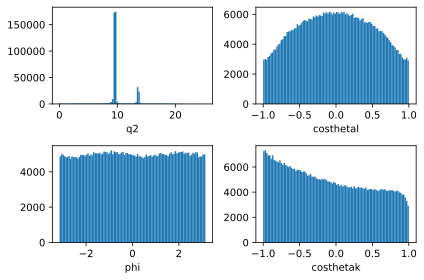

In [13]:
def plot_all(df):
    fig, axs = plt.subplots(2,2)
    axs[0,0].hist(df['q2'], 100)
    axs[0,0].set_xlabel('q2')

    axs[1,0].hist(df['phi'], 100)
    axs[1,0].set_xlabel('phi')

    axs[0,1].hist(df['costhetal'], 100)
    axs[0,1].set_xlabel('costhetal')

    axs[1,1].hist(df['costhetak'], 100)
    axs[1,1].set_xlabel('costhetak')

    plt.tight_layout()
    fig.show()
    return

plot_all(total)

#plt.tight_layout()


A look at the characteristic distributions for simulated data

/var/folders/55/y8nplzr92z3002w35fdrm2wc0000gn/T/ipykernel_12377/3469343344.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


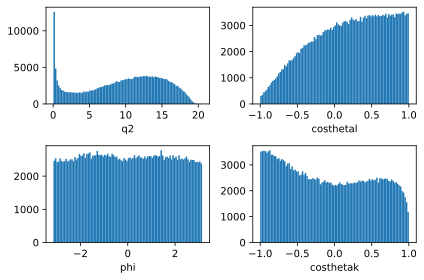

In [14]:
plot_all(sig)

/var/folders/55/y8nplzr92z3002w35fdrm2wc0000gn/T/ipykernel_12377/3469343344.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


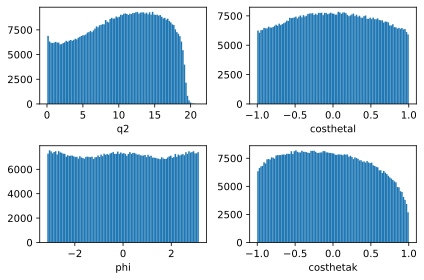

In [15]:
plot_all(acc)